In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("../data/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv",quotechar='"')
data.head()


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1369808562,CSY6322,NY,PAS,06/30/2014,19,SUBN,TOYOT,P,0,...,WHITE,0,0,-,0,NaN,NaN,NaN,NaN,NaN
1,1371533763,FXL4398,NY,PAS,06/30/2014,46,SUBN,SATUR,P,0,...,BLUE,0,2005,-,0,NaN,NaN,NaN,NaN,NaN
2,1370617069,82553JZ,NY,COM,06/30/2014,95,VAN,FORD,P,15410,...,WHITE,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
3,1370413026,ETU8952,NY,PAS,06/30/2014,21,SUBN,TOYOT,S,26130,...,BLUE,0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1370402405,EBV8572,NY,SRF,06/30/2014,21,SDN,TOYOT,S,50770,...,GREY,0,2007,-,0,NaN,NaN,NaN,NaN,NaN


In [3]:
data_by_register = data.groupby("Registration State").count().sort_values("Summons Number",ascending=0)["Summons Number"]
data_by_register.head()

Registration State
NY    3692
NJ     298
99     171
PA     137
CT      61
Name: Summons Number, dtype: int64

In [4]:
data_by_violation = data[data["Violation Code"]==40].groupby("Violation 
                                                             
                                                             ").count().sort_values("Violation Code",ascending=0)["Violation Code"]
data_by_violation.head()

Violation Precinct
67     26
115    15
46     15
19     14
104    13
Name: Violation Code, dtype: int64

In [5]:
data_plate = data[data["Violation Code"]==40].groupby('Plate ID').count()
data_plate.reset_index(inplace=True)
data_plate.sort_values("Plate ID",ascending=0,inplace=True)
data_plate.head()

,Plate ID,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
432,ZKP114,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
431,YTV21D,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
430,Y67CYK,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
429,XZ876G,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
428,XANR39,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,0,0,0,0,0


In [6]:
data_car = data[(data["Violation Code"]==40) & (data["Plate ID"]=="ZKP114")]
data_car

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
1703,1360908833,ZKP114,OK,PAS,12/22/2014,40,DELV,GMC,P,68930,...,WHITE,0,0,-,0,NaN,NaN,NaN,NaN,NaN


In [7]:
data_color = data.groupby("Vehicle Color").count().sort_values("Summons Number",ascending=0)["Summons Number"]
data_color.head()

Vehicle Color
WHITE    778
WH       394
BLACK    338
GY       303
BLK      266
Name: Summons Number, dtype: int64

In [8]:
table = data
table['minute'] = table['Violation Time'].apply(lambda x: str(x)[2:4])
data_by_minute = data.groupby("minute").count()
data_by_minute.sort_values(by='Summons Number',inplace=True,ascending=False)
data_by_minute.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
minute,,,,,,,,,,,,,,,,,,,,,
00,228,228,228,228,228,228,223,216,228,228,...,217,228,228,228,228,0,0,0,0,0
15,209,209,209,209,209,209,202,194,209,209,...,204,209,209,209,209,0,0,0,0,0
45,194,194,194,194,194,194,184,188,194,194,...,189,194,194,194,194,0,0,0,0,0
50,191,191,191,191,191,191,185,187,191,191,...,188,191,191,191,191,0,0,0,0,0
40,183,183,183,183,183,183,177,168,183,183,...,181,183,183,183,183,0,0,0,0,0


C:\Users\j7jiang\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  if __name__ == '__main__':


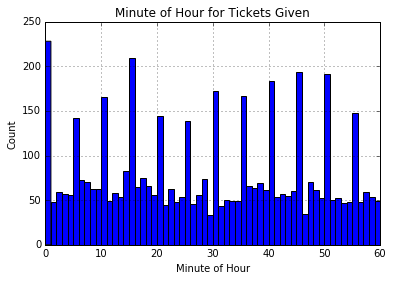

In [9]:
data["time"]=pd.to_datetime((data["Issue Date"]+ ' '+data["Violation Time"]+"M").str.replace(" 00"," 12"),format="%m/%d/%Y %I%M%p", coerce=True)
data.index = data["time"]
data_new = data
data_new["WeekDay"] = data_new.index.weekday
data_new["Hour"]= data_new.index.hour
data_new["Minute"]= data_new.index.minute


data_plot = data_new['Minute'].hist(bins=60,range=(0,60))
data_plot.set_xlabel("Minute of Hour") 
data_plot.set_ylabel("Count") 
data_plot.set_title("Minute of Hour for Tickets Given")


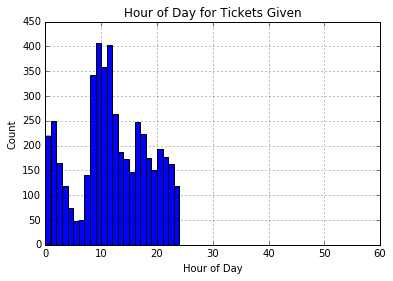

In [10]:
data_plot = data_new['Hour'].hist(bins=60,range=(0,60))
data_plot.set_xlabel("Hour of Day") 
data_plot.set_ylabel("Count") 
data_plot.set_title("Hour of Day for Tickets Given")